## Εx.1.1.


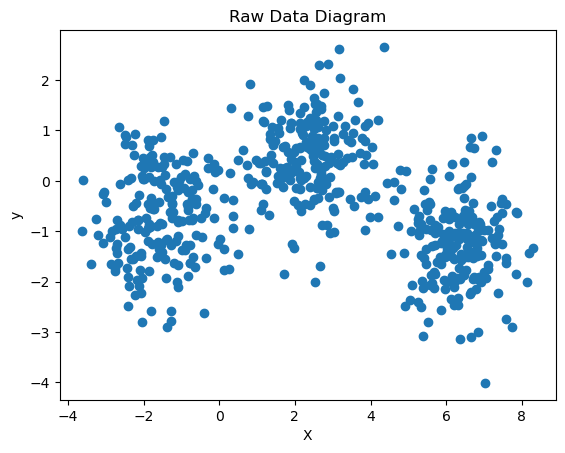

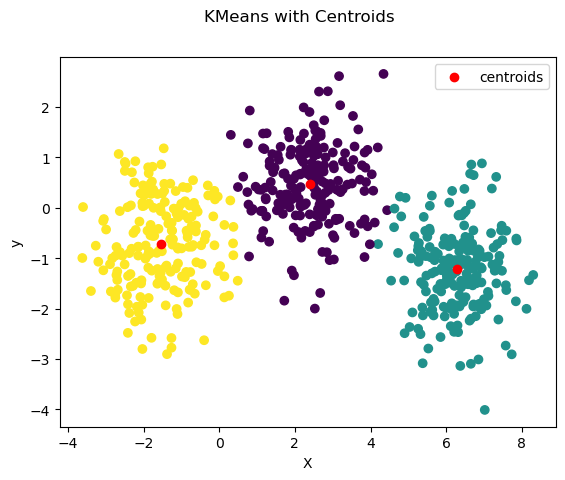

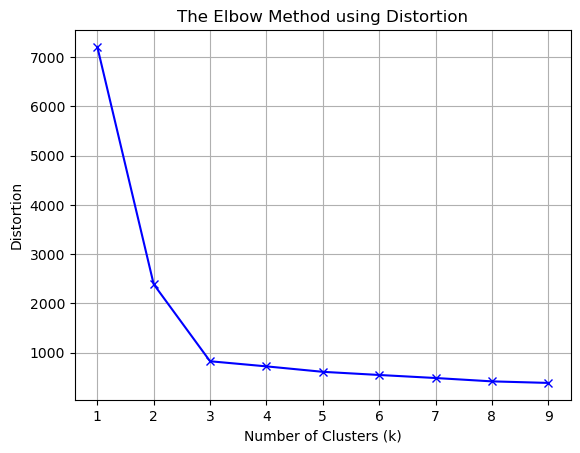

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from scipy.spatial.distance import cdist

data = pd.read_csv('C:/Users/souli/Downloads/HW07_data.csv')
data = np.array(data)

x1 = data[:,0]
x2 = data[:,1] #twra den exw x kai y dedomena opou x na einai ta features kai y ta labels/ exv mono x (afou den dinontai labels sto KMeans)

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) #X = np.column_stack((x1, x2))  ή με αυτον τον τρόπο
plt.scatter(x1,x2)
plt.title('Raw Data Diagram')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

n_clusters=3

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
yhat = kmeans.predict(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X[:,0], X[:,1], c=yhat)
ax1.scatter(centroids_x,centroids_y,label='centroids',c='red')
plt.legend()
fig.suptitle('KMeans with Centroids')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

distortions = [] # (παραμόρφωση) η συνολική απόσταση όλων των σημείων από τα κέντρα 
                     #των clusters τους
K = range(1, 10)

for i in K:
    kmeanAgkonas = KMeans(n_clusters=i, random_state=42).fit(X)    
    distortions.append(kmeanAgkonas.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()

#using the best n form the diagram plot/print the coordinates of the centroids
#i found the n i predicted so the diagram is the same as the second one

## Ex.1.2.